## Numerical Integration Methods

#### Session 1

Jeff Shen | 1004911526

Stacy Ossipov | 1004877779

10 Feb 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
# velocity function
def v(x):
    return np.diff(x)

# acceleration function
def a(x):
    return np.diff(np.diff(x))

In [3]:
# change in time (between samples) in seconds 
dt = 0.01

#initial time in seconds
t0 = 0

# total/end time in seconds
t = 10

# period. seconds / # of oscillations
p = t/14.5

# mass in kg
m = 0.2

# angular frequency
omega = 2*np.pi / p

# k (spring constant)
k = np.square(omega) * m

In [4]:
data = pd.read_csv('data.txt', delimiter='\t')
data = data['Sample'][250:1250]
data = data.reset_index().Sample

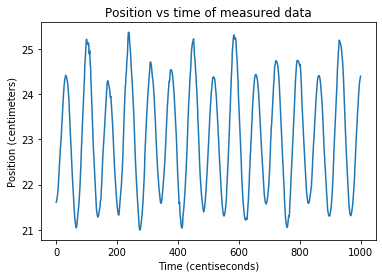

In [5]:
plt.plot(data)
plt.title('Position vs time of measured data')
plt.xlabel('Time (centiseconds)')
plt.ylabel('Position (centimeters)')
plt.savefig('timepos0.png')

In [6]:
# initializing arrays for numerical integration
ys = np.zeros(1000)
vs = np.zeros(1000)

ys[0] = data[0]
vs[0] = v(data)[0]

In [7]:
# numerical integration
for i in np.arange(999):
    ys[i+1] = ys[i] + dt * vs[i]
    vs[i+1] = vs[i] - dt * np.square(omega) * ys[i]

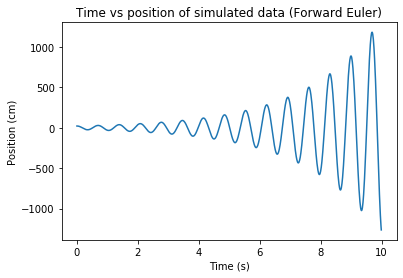

In [8]:
plt.plot(np.arange(0, t, dt), ys)
plt.title('Time vs position of simulated data (Forward Euler)')
plt.xlabel('Time (s)')
plt.ylabel('Position (cm)')
plt.savefig('timepos1.png')

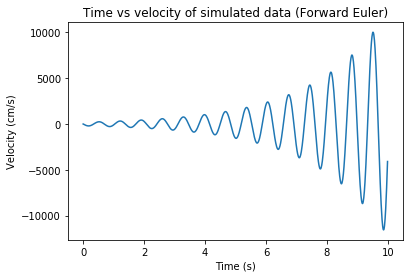

In [9]:
plt.plot(np.arange(0, t, dt), vs)
plt.title('Time vs velocity of simulated data (Forward Euler)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')
plt.savefig('timevel1.png')

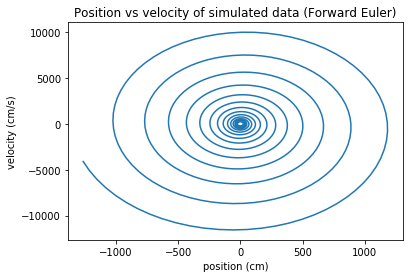

In [10]:
plt.plot(ys, vs)
plt.title('Position vs velocity of simulated data (Forward Euler)')
plt.xlabel('position (cm)')
plt.ylabel('velocity (cm/s)')
plt.savefig('phase1.png')

In [11]:
# calculating energy
e = 1/2 * m * np.square(vs) + 1/2 * k * np.square(ys)

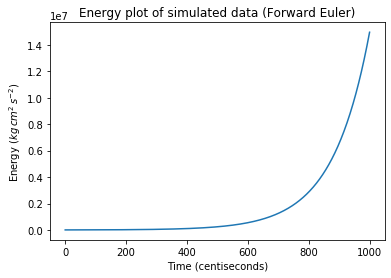

In [12]:
plt.plot(e)
plt.title('Energy plot of simulated data (Forward Euler)')
plt.xlabel('Time (centiseconds)')
plt.ylabel(r'Energy ($kg\,cm^2\,s^{-2}$)')
plt.savefig('eplot1.png')

In [13]:
# initializing second array
ys2 = np.zeros(1000)
vs2 = np.zeros(1000)

ys2[0] = data[0]
vs2[0] = v(data)[0]

In [14]:
# Euler-Cromer method
for i in np.arange(999):
    ys2[i+1] = ys2[i] + dt * vs2[i]
    vs2[i+1] = vs2[i] - dt * k / m * ys2[i+1]

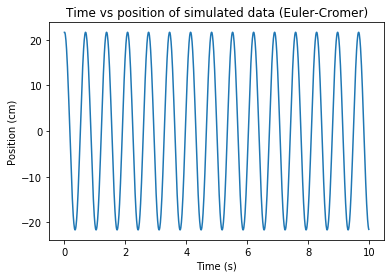

In [15]:
# position plot of euler-cromer
plt.plot(np.arange(0, t, dt), ys2)
plt.title('Time vs position of simulated data (Euler-Cromer)')
plt.xlabel('Time (s)')
plt.ylabel('Position (cm)')
plt.savefig('timepos2.png')

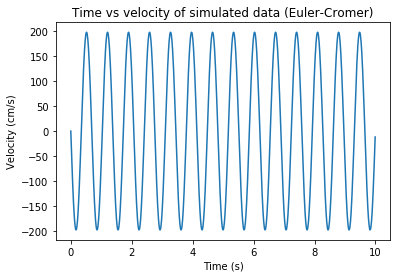

In [16]:
# velocity plot of euler-cromer
plt.plot(np.arange(0, t, dt), vs2)
plt.title('Time vs velocity of simulated data (Euler-Cromer)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')
plt.savefig('timevel2.png')

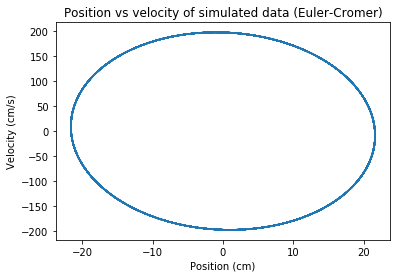

In [17]:
plt.plot(ys2, vs2)
plt.title('Position vs velocity of simulated data (Euler-Cromer)')
plt.xlabel('Position (cm)')
plt.ylabel('Velocity (cm/s)')
plt.savefig('phase2.png')

In [18]:
# calculating energy
e2 = 1/2 * m * np.square(vs2) + 1/2 * k * np.square(ys2)

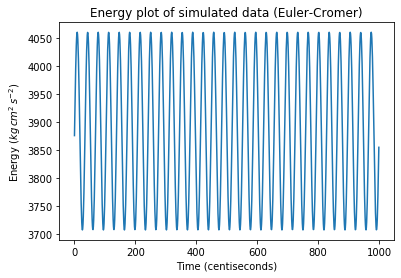

In [19]:
plt.plot(e2)
plt.title('Energy plot of simulated data (Euler-Cromer)')
plt.xlabel('Time (centiseconds)')
plt.ylabel(r'Energy ($kg\,cm^2\,s^{-2}$)')
plt.savefig('eplot2.png')

In [20]:
print('Values from experiment:')
print(f'Period: {p:.2f} s')
print(f'Frequency: {1/p:.2f} cycles/s')
print(f'Amplitude: {ys2.max() - ys2.mean():.2f} cm')
print(f'Spring constant: {k:.2f} kg cm^2 / s^2')

Values from experiment:
Period: 0.69 s
Frequency: 1.45 cycles/s
Amplitude: 21.60 cm
Spring constant: 16.60 kg cm^2 / s^2
